In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

def flatten(xss):
    return [x for xs in xss for x in xs]



In [74]:
i = [300, 301,302,303,304,305, 502, 503]
treshold =  0.999936657516334

final_list = []

for ID in i:

    open_file = open(f"test_{ID}/log.txt", "r")

    lines = open_file.readlines()

    list_param = []

    list_param.append([])
    list_param[-1].append("\"test_name\" : \""+str(f"test_{ID}")+"\"")


    for i in range(39,60):
        
        lines_txt = lines[i][:-1]
        
        index = lines_txt.find(':')-1
        
        output_line = lines_txt[:index] + '"' + lines_txt[index:]

        index = output_line.find(':')

        if "dataset" in output_line or "mode" in output_line or "data_path" in output_line or "model_save_path" in output_line:
            
            output_line = output_line[:index+2] + '"' + output_line[index+2:] + '"'

        list_param[-1].append(str("\"")+str(output_line))

    dict_list = []

    for i in list_param:
        dict_list.append(eval("{" + ", ".join(i) + "}"))

    dict_list = dict_list[0]

    dict_list["dataset_name"] = eval(dict_list["dataset_name"])

    whole_ds = pd.concat([pd.read_csv(os.path.join(dict_list['data_path'], dict_list['dataset_name'][0])), pd.read_csv(os.path.join(dict_list['data_path'], dict_list['dataset_name'][1]))])

    keyyy = []

    for i in whole_ds.keys():
        keyyy.append(i)

    keyyy = keyyy[1:]

    whole_ds.drop(columns=keyyy, inplace=True)
    whole_ds

    training_df = pd.read_csv(f'test_{dict_list["ID"]}/train_energy.csv', names=["score"])

    tests_df = pd.read_csv(f'test_{dict_list["ID"]}/train_energy_test.csv', names=["score"])

    whole_results = pd.concat([tests_df,training_df ], axis=0, ignore_index=True, )

    merged = pd.merge(whole_ds, whole_results, left_index=True, right_index=True)

    trsh = np.quantile(merged['score'].values, treshold)

    points = merged.where(merged['score'] > trsh).dropna()

    for i in points.keys():
        if i != 'time':
            points.drop(columns=i, inplace=True)

    final_list.append( points.values.tolist())

for i in range(len(final_list)):
    final_list[i] = flatten(final_list[i])


len(final_list)

8

In [67]:
final_list

[[], [], [], [], [], [], [], [], ['2022-09-12 19:44:00'], []]

In [14]:
len(set(final_list))

46

(array([18932., 18993., 19052., 19113., 19174., 19236., 19297.]),
 [Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11')])

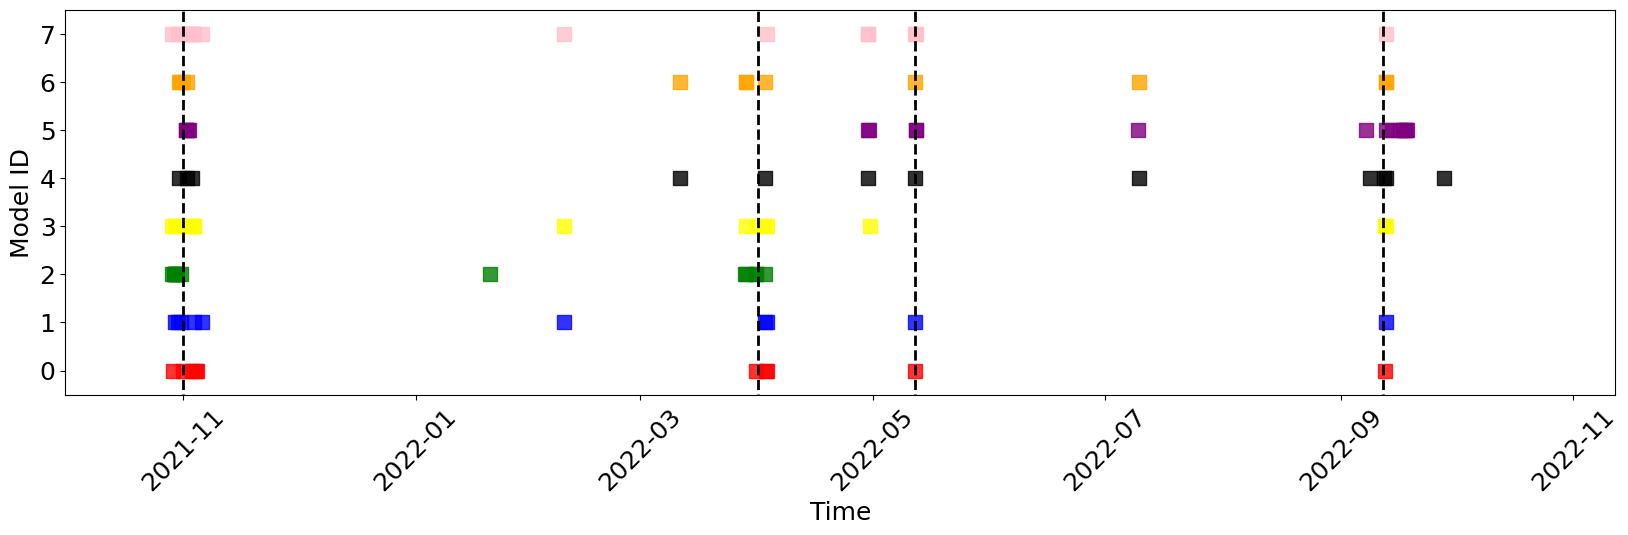

In [104]:
colors = ['red', 'blue', 'green', 'yellow', 'black', 'purple', 'orange', 'pink', 'brown', 'grey']

plt.figure(figsize=(20,5))

#change font
plt.rcParams.update({'font.size': 18})

for i in range(len(final_list)):
    plt.scatter(pd.to_datetime(final_list[i]), np.ones(len(final_list[i]))*i, alpha=0.8, color=colors[i], marker='s', s=100)

#plt.scatter(pd.to_datetime(final_list), np.ones(len(final_list)), alpha=0.1)
#plt.xlim(pd.to_datetime('2021-10-23'), pd.to_datetime('2021-11-25'))

plt.vlines(pd.to_datetime('2021-11-01'), -1, len(final_list)+1, color='black', linestyle='--', alpha=1, linewidth=2)

plt.vlines(pd.to_datetime('2022-04-01'), -1, len(final_list)+1, color='black', linestyle='--', alpha=1, linewidth=2)

plt.vlines(pd.to_datetime('2022-05-12'), -1, len(final_list)+1, color='black', linestyle='--', alpha=1, linewidth=2)

plt.vlines(pd.to_datetime('2022-09-12'), -1, len(final_list)+1, color='black', linestyle='--', alpha=1, linewidth=2)

plt.xlim(pd.to_datetime('2021-10-1'), pd.to_datetime('2022-11-12'))
plt.yticks(range(0,8))
plt.ylabel('Model ID')
plt.xlabel('Time')
plt.ylim(-0.5, len(final_list)-0.5)
plt.xticks(rotation=45)